# Topic 21 Nyquist 

In [25]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d, margin
from control import bode_plot, nyquist_plot, nyquist_response
    
import cmath
from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found


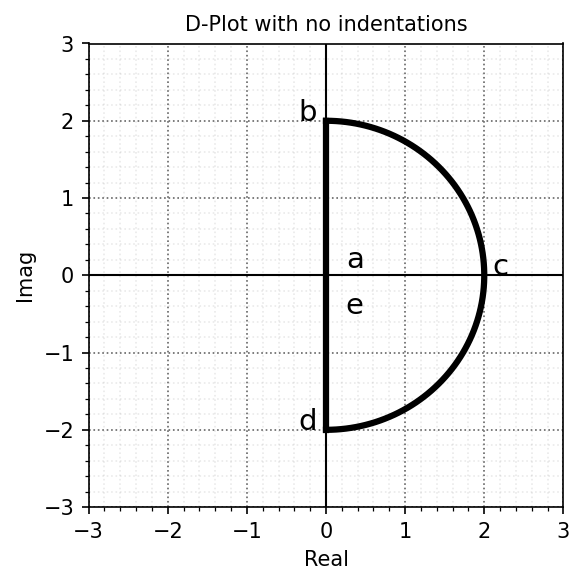

In [26]:
r = 2
an = np.linspace(np.pi/2, -np.pi/2, 100) 
fig, (c3) = plt.subplots(ncols=1, figsize=(4, 4))
c3.plot(r * np.cos(an), r * np.sin(an),'k',lw=3)
c3.plot([0,0],[-r,r],'k',lw=3)
c3.set_xlim((-3,3))
c3.set_ylim((-3,3))
nicegrid(c3)
c3.text(.25,0.1,'a',fontsize=14) 
c3.text(.250,-0.5,'e',fontsize=14) 
c3.text(-.35,-r,'d',fontsize=14) 
c3.text(r+.1,0,'c',fontsize=14) 
c3.text(-.35,r,'b',fontsize=14) 
c3.set_xlabel('Real')
c3.set_ylabel('Imag')
c3.set_title('D-Plot with no indentations')
savefig("./figs/L19_circ2.pdf", dpi=600)
plt.show()

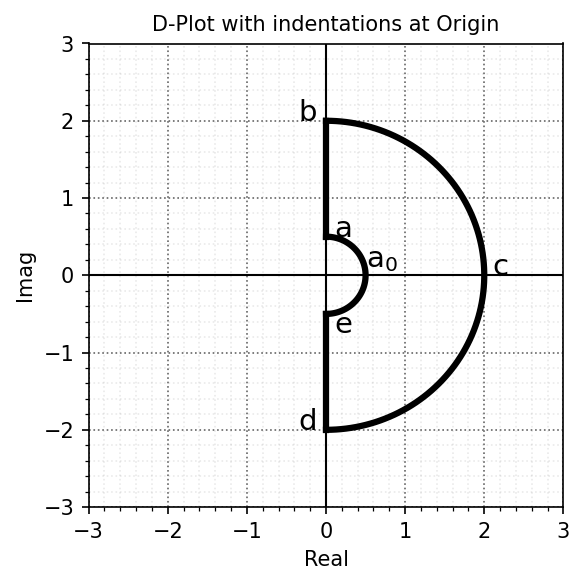

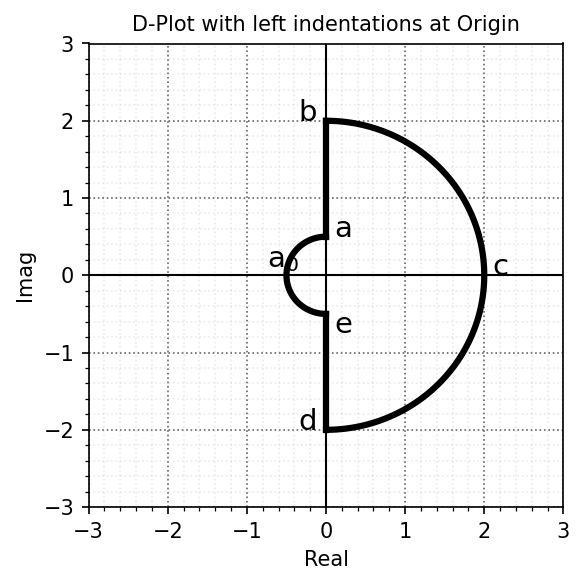

In [27]:
RR = 0.5
r = 2
an = np.linspace(np.pi/2, -np.pi/2, 100) 
fig, (c3) = plt.subplots(ncols=1, figsize=(4, 4))
c3.plot(r * np.cos(an), r * np.sin(an),'k',lw=3)
c3.plot(RR * np.cos(an), RR * np.sin(an),'k',lw=3)
c3.plot([0,0],[-r,-RR],'k',lw=3)
c3.plot([0,0],[RR,r],'k',lw=3)
c3.set_xlim((-3,3))
c3.set_ylim((-3,3))
nicegrid(c3)
c3.text(0.1,RR,'a',fontsize=14) 
c3.text(RR,0.1,r'a$_0$',fontsize=14) 
c3.text(.1,-RR-.25,'e',fontsize=14) 
c3.text(-.35,-r,'d',fontsize=14) 
c3.text(r+.1,0,'c',fontsize=14) 
c3.text(-.35,r,'b',fontsize=14) 
c3.set_xlabel('Real')
c3.set_ylabel('Imag')
c3.set_title('D-Plot with indentations at Origin')
savefig("./figs/L19_circ3.pdf", dpi=600)
plt.show()

fig, (c3) = plt.subplots(ncols=1, figsize=(4, 4))
c3.plot(r * np.cos(an), r * np.sin(an),'k',lw=3)
c3.plot(-RR * np.cos(an), RR * np.sin(an),'k',lw=3)
c3.plot([0,0],[-r,-RR],'k',lw=3)
c3.plot([0,0],[RR,r],'k',lw=3)
c3.set_xlim((-3,3))
c3.set_ylim((-3,3))
nicegrid(c3)
c3.text(0.1,RR,'a',fontsize=14) 
c3.text(-RR-.25,0.1,r'a$_0$',fontsize=14) 
c3.text(.1,-RR-.25,'e',fontsize=14) 
c3.text(-.35,-r,'d',fontsize=14) 
c3.text(r+.1,0,'c',fontsize=14) 
c3.text(-.35,r,'b',fontsize=14) 
c3.set_xlabel('Real')
c3.set_ylabel('Imag')
c3.set_title('D-Plot with left indentations at Origin')
savefig("./figs/L19_circ4.pdf", dpi=600)
plt.show()

## Impact of the Relative Degree

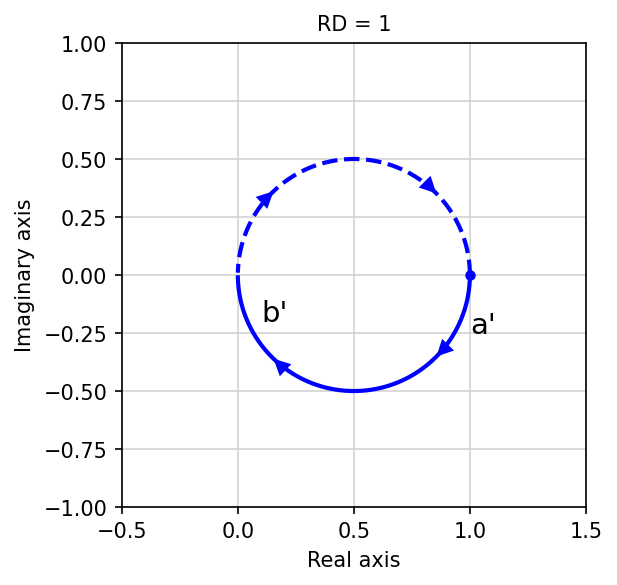

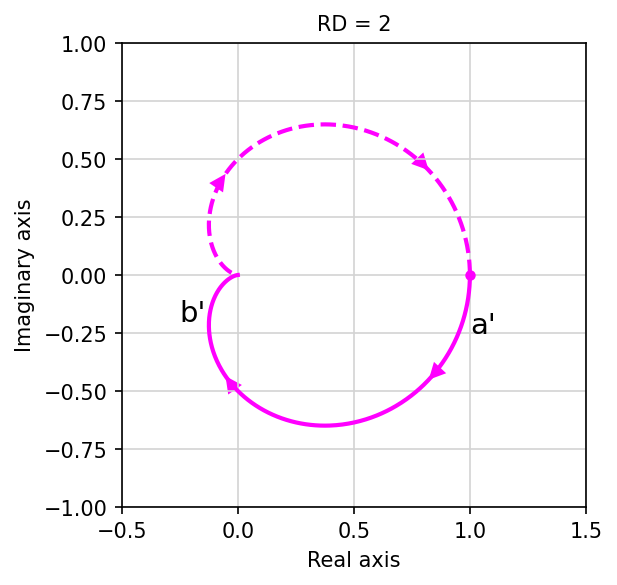

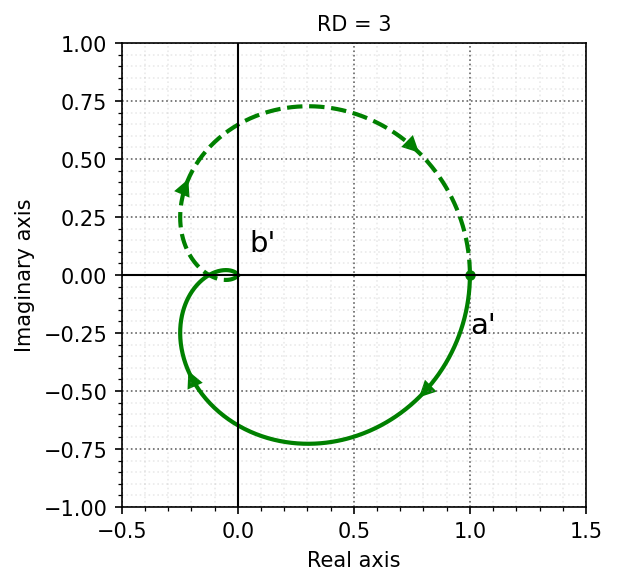

In [28]:
#21-3
# 3 poles
p1 = 1
p2 = 0.9
p3 = 0.8

# 3 systems
G1 = tf([p1],[1, p1])
G2 = G1*tf([p2],[1, p2])
G3 = G2*tf([p3],[1, p3])

RR = 0.05

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
resp = nyquist_response(G1,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
ax.set_xlim([-.5,1.5])
ax.set_ylim([-1.,1.])
ax.set_aspect('equal')
ax.text(1,-0.25,"a'",fontsize=14) 
ax.text(.1,-.2,"b'",fontsize=14) 
ax.set_title('RD = 1')
savefig("./figs/L19_3a.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
#nyquist_plot(G2,w,indent_direction='right',indent_radius=RR,indent_points=100,**kwargs)
resp = nyquist_response(G2,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='magenta',linewidth=2,ax=ax)
ax.set_xlim([-.5,1.5])
ax.set_ylim([-1.,1.])
ax.set_aspect('equal')
ax.text(1,-0.25,"a'",fontsize=14) 
ax.text(-.25,-.2,"b'",fontsize=14) 
ax.set_title('RD = 2')
savefig("./figs/L19_3b.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
#nyquist_plot(G3,w,indent_direction='right',indent_radius=RR,indent_points=100,**kwargs)
resp = nyquist_response(G3,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='g',linewidth=2,ax=ax)
ax.set_xlim([-.5,1.5])
ax.set_ylim([-1.,1.])
ax.set_aspect('equal')
ax.text(1,-0.25,"a'",fontsize=14) 
ax.text(.05,.1,"b'",fontsize=14) 
ax.set_title('RD = 3')
nicegrid(ax)
savefig("./figs/L19_3c.pdf", dpi=600)


## Indent Left instead of Right

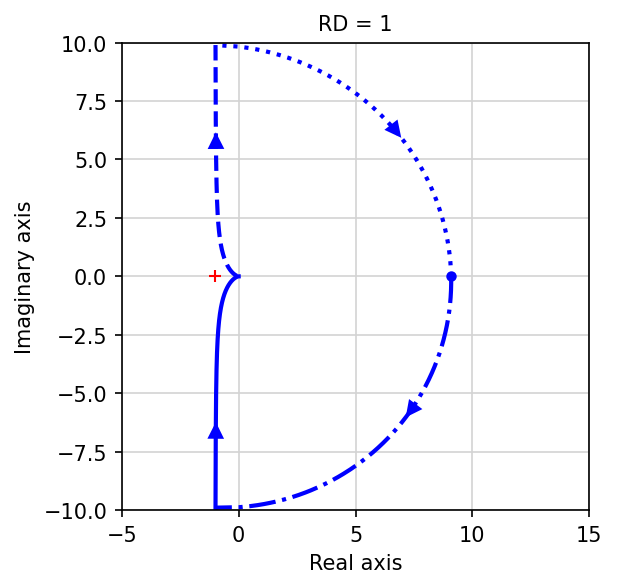

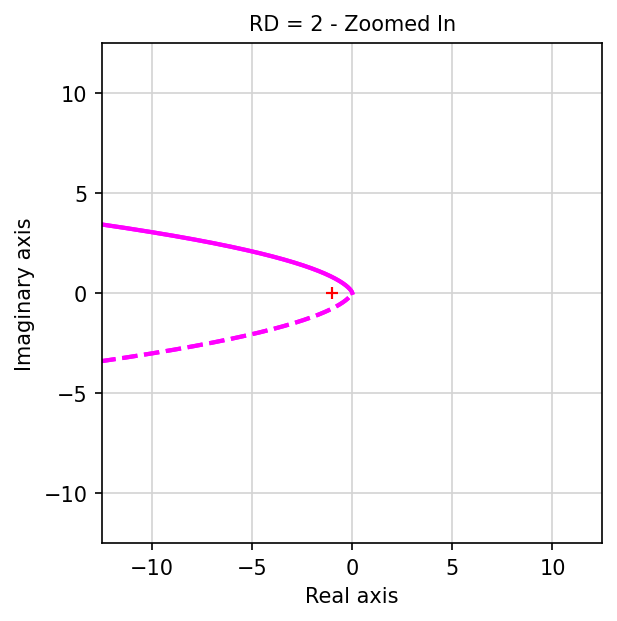

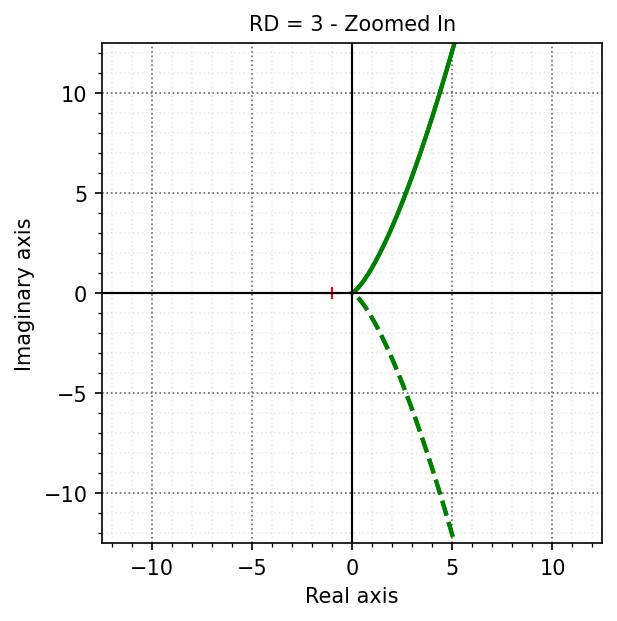

In [29]:
#21-5
G1 = tf([1],[1, 1]) * tf([1],[1, 0])
G2 = tf([1],[1, 1]) * tf([1],[1, 0])**2
G3 = tf([1],[1, 1]) * tf([1],[1, 0])**3

w=np.logspace(-6,6,5000)
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
RR = 0.1
resp = nyquist_response(G1,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.xlim([-5,15])
plt.ylim([-10,10])
ax.set_aspect('equal')
ax.set_title('RD = 1')
savefig("./figs/L19_Nyq_type1.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
RR = 0.01
resp = nyquist_response(G2,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='magenta',linewidth=2,ax=ax)
plt.xlim(np.array(5)*[-25,25])
plt.ylim(np.array(5)*[-25,25])
ax.set_aspect('equal')
ax.set_title('RD = 2')
savefig("./figs/L19_Nyq_type2.pdf", dpi=600)

# zoomed in
nyquist_plot(resp,color='magenta',linewidth=2,ax=ax)
plt.xlim(np.array(.5)*[-25,25])
plt.ylim(np.array(.5)*[-25,25])
ax.set_aspect('equal')
ax.set_title('RD = 2 - Zoomed In')
savefig("./figs/L19_Nyq_type2z.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
#nyquist_plot(G3,w,indent_direction='right',indent_radius=RR,indent_points=100,**kwargs)
resp = nyquist_response(G3,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='g',linewidth=2,ax=ax)
plt.xlim(np.array(5)*[-25,25])
plt.ylim(np.array(5)*[-25,25])
ax.set_aspect('equal')
ax.set_title('RD = 3')
nicegrid(ax)
savefig("./figs/L19_Nyq_type3.pdf", dpi=600)

nyquist_plot(resp,color='g',linewidth=2,ax=ax)
plt.xlim(np.array(.5)*[-25,25])
plt.ylim(np.array(.5)*[-25,25])
ax.set_aspect('equal')
ax.set_title('RD = 3 - Zoomed In')
nicegrid(ax)
savefig("./figs/L19_Nyq_type3z.pdf", dpi=600)


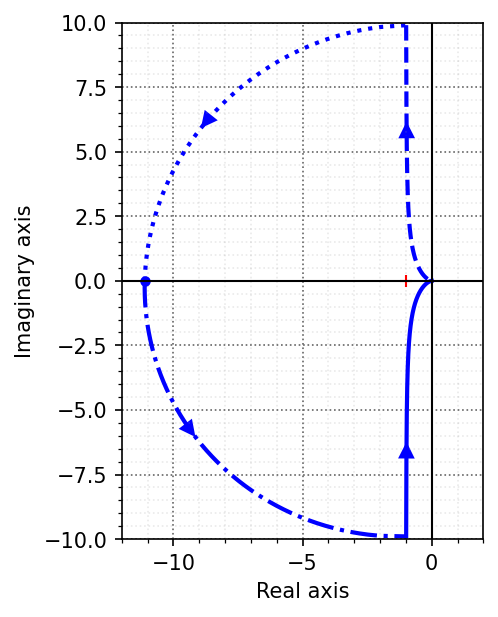

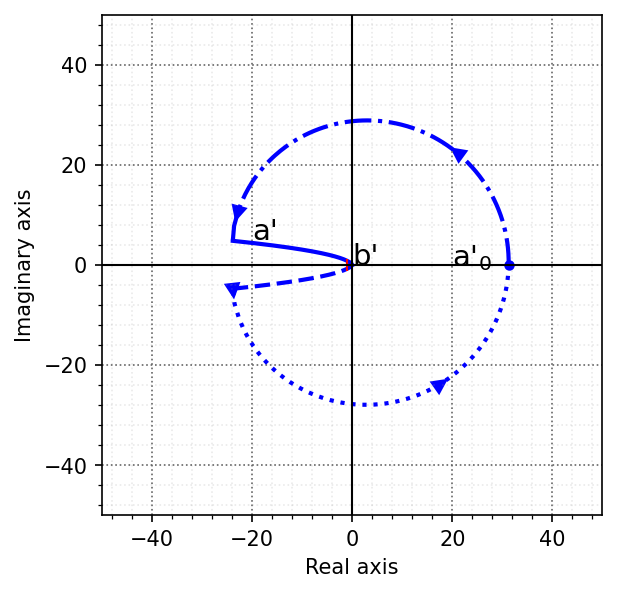

In [30]:
w=np.logspace(-6,6,5000)
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
RR = 0.1
resp = nyquist_response(G1,w,indent_direction='left',indent_radius=RR,indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.xlim([-12,2])
plt.ylim([-10,10])
ax.set_aspect('equal')
nicegrid(ax,-1)
savefig("./figs/L19_Nyq_type1_left.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
resp = nyquist_response(G2,w,indent_direction='left',indent_radius=.2,indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.xlim(np.array(2)*[-25,25])
plt.ylim(np.array(2)*[-25,25])
ax.set_aspect('equal')
nicegrid(ax,-1)
ax.text(20,-0.25,"a'$_0$",fontsize=14) 
ax.text(-20,5,"a'",fontsize=14) 
ax.text(.05,.1,"b'",fontsize=14) 
savefig("./figs/L19_Nyq_type2_left.pdf", dpi=600)


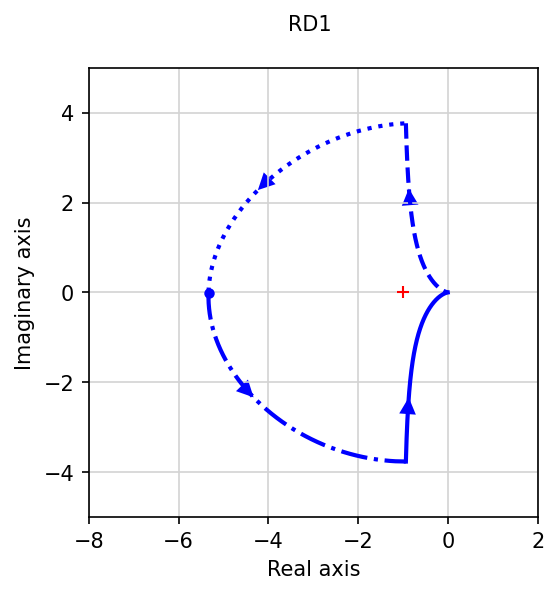

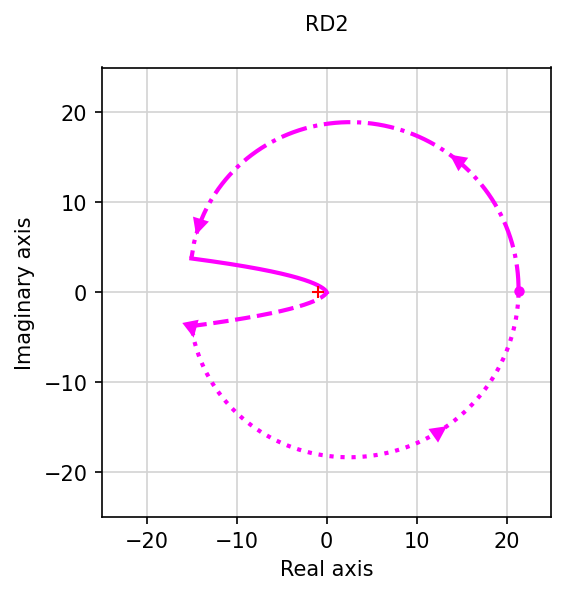

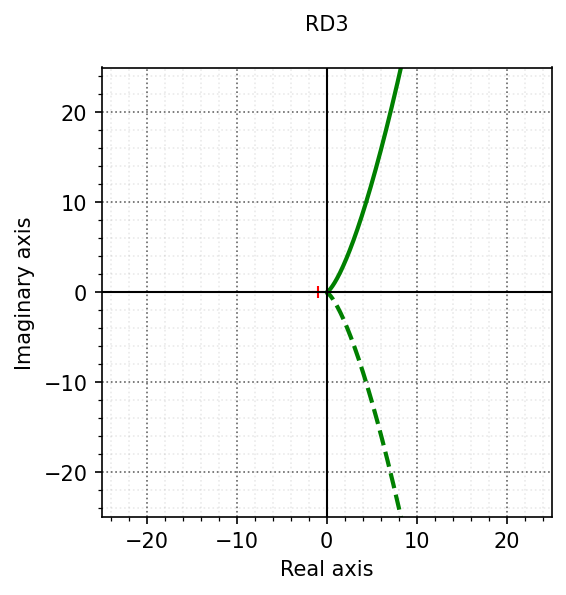

In [31]:
# Indent left
#20-8
RR = .25
w=np.logspace(-3,1,5000)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'b','linewidth':2}
resp = nyquist_response(G1,w,indent_direction='left',indent_radius=RR,indent_points=100)
nyquist_plot(resp,title='RD1 ',**kwargs)
plt.xlim([-8,2])
plt.ylim([-5,5])
ax.set_aspect('equal')

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'magenta','linewidth':2}
resp = nyquist_response(G2,w,indent_direction='left',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,title='RD2')
plt.xlim([-25,25])
plt.ylim([-25,25])
ax.set_aspect('equal')

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'g','linewidth':2}
resp = nyquist_response(G3,w,indent_direction='left',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,title='RD3')
plt.xlim([-25,25])
plt.ylim([-25,25])
ax.set_aspect('equal')
nicegrid(ax,-1)


Found breakin/out at K = 3.732
At possible locations s = -1.366

Found breakin/out at K = 0.268
At possible locations s = 0.366


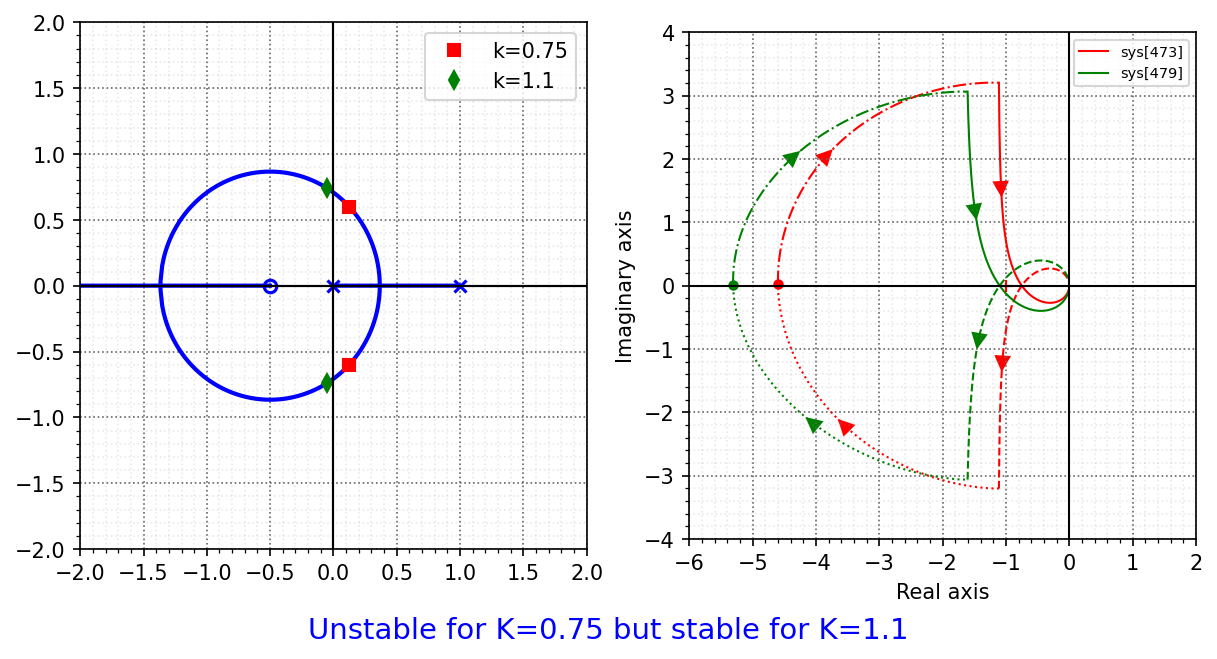

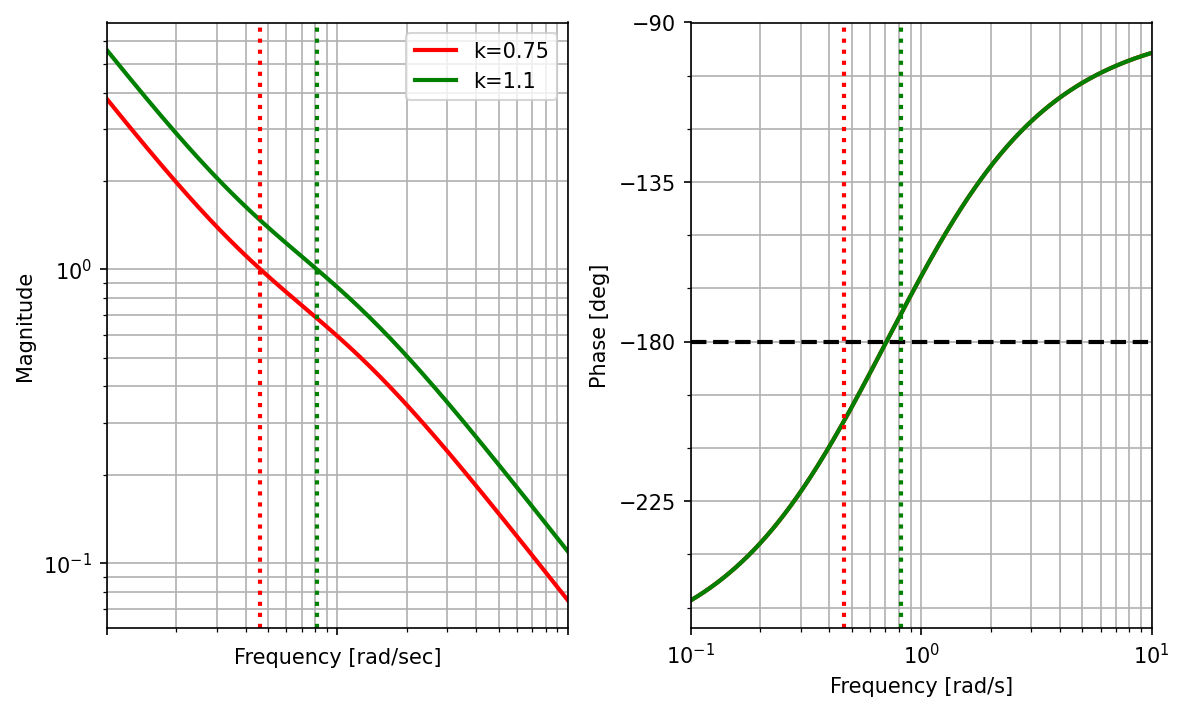

In [32]:
# stability analysis example on 21-10
gain1 = 0.75
gain2 = 1.1
G = 0.5*tf((2,1),(1,-1,0))
Gcl1 = feedback(G,gain1)
Gcl3 = feedback(G,gain2)
scl1 = Gcl1.poles()
scl3 = Gcl3.poles()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax[0])
ax[0].set_xlim([-2, 2]);ax[0].set_ylim([-2, 2])
nicegrid(ax[0])
#ax[0].set_title('Gamma > 0, K={:2d}'.format(K),loc='left')
ax[0].plot(scl1.real,scl1.imag,'rs',ms=6,label='k='+str(gain1))
ax[0].plot(scl3.real,scl3.imag,'gd',ms=6,label='k='+str(gain2))
h, l = ax[0].get_legend_handles_labels()
ax[0].legend(handles=[item for item in h[2:]], labels= [item for item in l[2:]])
                                                    
RR = .15
plt.sca(ax[1])
kwargs = {'color':'r','linewidth':1}
resp = nyquist_response(gain1*G,w,indent_direction='right',indent_radius=gain1*RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
kwargs = {'color':'g','linewidth':1}
resp = nyquist_response(gain2*G,w,indent_direction='right',indent_radius=gain2*RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
plt.xlim([-6,2])
plt.ylim([-4,4])
ax[1].set_aspect('equal')
nicegrid(ax)
caption("Unstable for K="+str(gain1)+" but stable for K="+str(gain2),fig)
savefig('./figs/L15_10.pdf')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8, 5),dpi=150,constrained_layout = True)
kwargs = {'color':'r','linewidth':2}
Gfreq1 = bode_plot(gain1*G,plot=True,**kwargs,dB=False)
kwargs = {'color':'g','linewidth':2}
Gfreq3 = bode_plot(gain2*G,plot=True,**kwargs,dB=False)

ax1,ax2 = plt.gcf().axes
ax1.legend(('k='+str(gain1),'k='+str(gain2)))
ax2.axhline(y=-180,c='k',ls="--")
wc1 = np.interp(1,np.flipud(Gfreq1[0]),np.flipud(Gfreq1[2]))
wc3 = np.interp(1,np.flipud(Gfreq3[0]),np.flipud(Gfreq3[2]))
ax1.axvline(x=wc1,c='r',ls=":")
ax2.axvline(x=wc1,c='r',ls=":")
ax1.axvline(x=wc3,c='g',ls=":")
ax2.axvline(x=wc3,c='g',ls=":")
ax[0].set_xlabel("Frequency [rad/sec]")
savefig('./figs/L15_11.pdf')
plt.show()

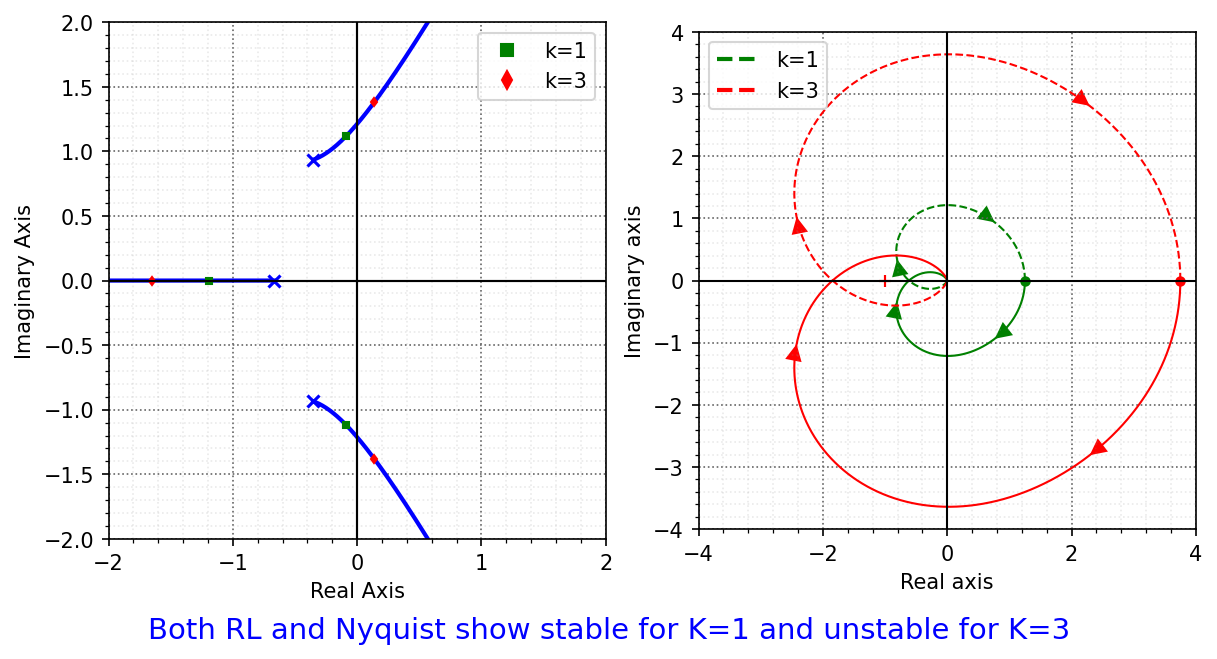

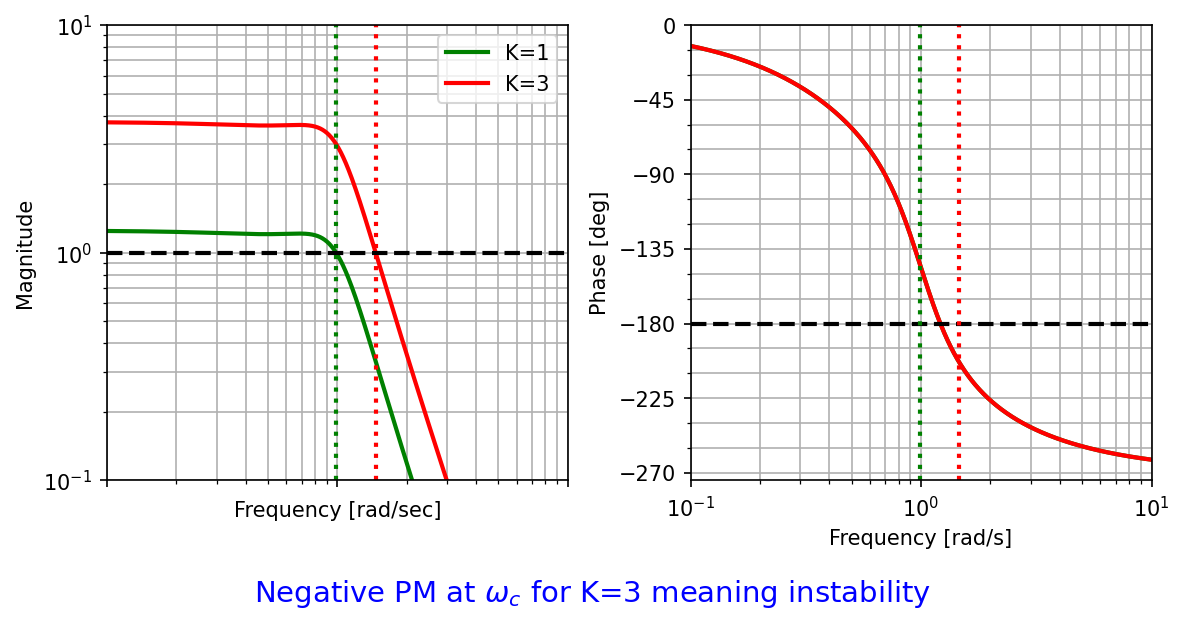

In [54]:
# stability analysis example on 21-9
RR = .15

G = tf(1.25, (1.5,2.061,2.207,1))
Gcl1 = feedback(G,1)
Gcl3 = feedback(3*G,1)

scl1 = Gcl1.poles()
scl3 = Gcl3.poles()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax[0])
ax[0].set_xlim([-2, 2]);ax[0].set_ylim([-2, 2])
nicegrid(ax[0])
#ax[0].set_title('Gamma > 0, K={:2d}'.format(K),loc='left')
ax[0].plot(scl1.real,scl1.imag,'gs',ms=3,label='k=1')
ax[0].plot(scl3.real,scl3.imag,'rd',ms=3,label='k=3')
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', marker='s', linestyle='None'),
    Line2D([0], [0], color='red', marker='d', linestyle='None')
]
ax[0].legend(custom_lines, ['k='+str(1), 'k='+str(3)])
ax[0].set_xlabel("Real Axis")
ax[0].set_ylabel("Imaginary Axis")

plt.sca(ax[1])
kwargs = {'color':'g','linewidth':1}
resp = nyquist_response(G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
kwargs = {'color':'r','linewidth':1}
resp = nyquist_response(3*G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
plt.xlim([-4,4])
plt.ylim([-4,4])
ax[1].set_aspect('equal')
nicegrid(ax)
caption("Both RL and Nyquist show stable for K=1 and unstable for K=3",fig)
savefig('./figs/L19_9a.pdf')
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', linestyle='--'),
    Line2D([0], [0], color='red', linestyle='--')
]
ax[1].legend(custom_lines, ['k='+str(1), 'k='+str(3)])
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'g','linewidth':2}
Gfreq1 = bode_plot(G,plot=True,**kwargs,dB=False)
kwargs = {'color':'r','linewidth':2}
Gfreq3 = bode_plot(3*G,plot=True,**kwargs,dB=False)

ax1,ax2 = plt.gcf().axes
ax1.legend(('K=1','K=3'))
ax2.axhline(y=-180,c='k',ls="--")
ax1.axhline(y=1,c='k',ls="--")
ax1.set_ylim(.1,10)
wc1 = np.interp(1,np.flipud(Gfreq1[0]),np.flipud(Gfreq1[2]))
wc3 = np.interp(1,np.flipud(Gfreq3[0]),np.flipud(Gfreq3[2]))
ax1.axvline(x=wc1,c='g',ls=":")
ax2.axvline(x=wc1,c='g',ls=":")
ax1.axvline(x=wc3,c='r',ls=":")
ax2.axvline(x=wc3,c='r',ls=":")
ax[0].set_xlabel("Frequency [rad/sec]")
caption("Negative PM at $\omega_c$ for K=3 meaning instability",fig)
savefig('./figs/L19_9b.pdf')


Poles of OL system:  [ 2. +0.j -0.3+0.j]

Found breakin/out at K = 2.057
At possible locations s = -1.207

Found breakin/out at K = 0.643
At possible locations s = 0.207


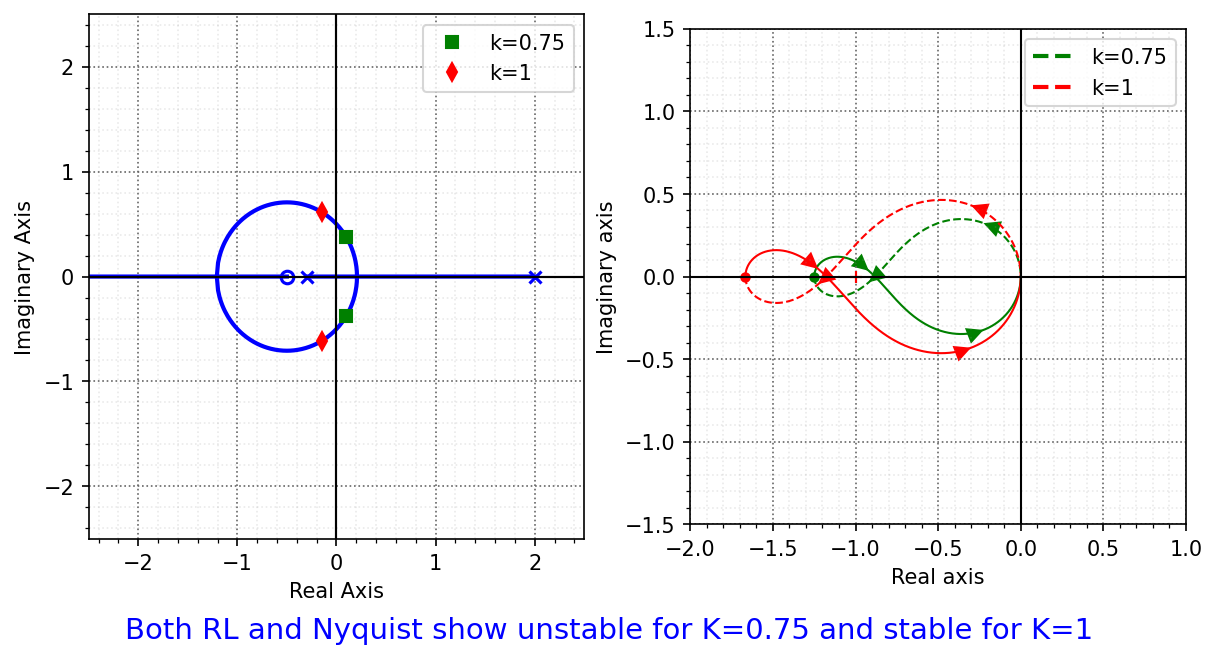

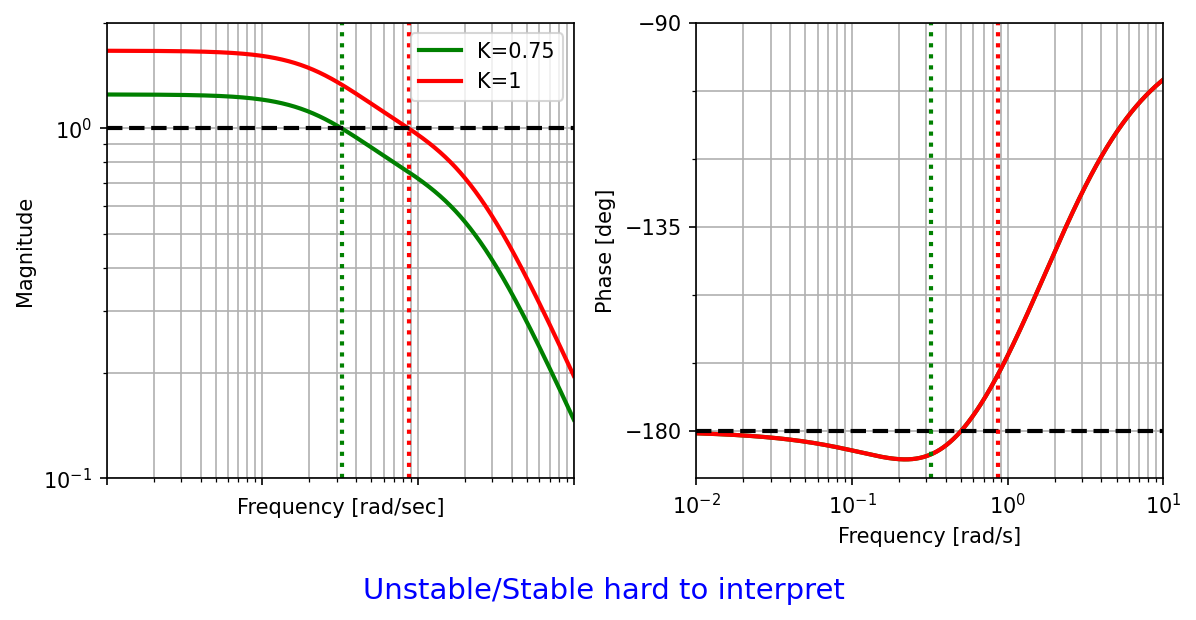

In [ ]:
# stability analysis example on 21-10
gain1 = 0.75
gain2 = 1

G = tf((2,1), (1,-1.7,-0.6))
print("Poles of OL system: ",G.poles())
Gcl1 = feedback(gain1*G,1)
Gcl2 = feedback(gain2*G,1)

scl1 = Gcl1.poles()
scl2 = Gcl2.poles()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax[0])
ax[0].set_xlim([-2.5, 2.5]);ax[0].set_ylim([-2.5, 2.5])
nicegrid(ax[0])
#ax[0].set_title('Gamma > 0, K={:2d}'.format(K),loc='left')
ax[0].plot(scl1.real,scl1.imag,'gs',ms=6,label='k='+str(gain1))
ax[0].plot(scl2.real,scl2.imag,'rd',ms=6,label='k='+str(gain2))
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', marker='s', linestyle='None'),
    Line2D([0], [0], color='red', marker='d', linestyle='None')
]
ax[0].legend(custom_lines, ['k='+str(gain1), 'k='+str(gain2)])
ax[0].set_xlabel("Real Axis")
ax[0].set_ylabel("Imaginary Axis")

plt.sca(ax[1])
ww = np.sort(np.append(w*1e3,w))
kwargs = {'color':'g','linewidth':1}
resp = nyquist_response(gain1*G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
kwargs = {'color':'r','linewidth':1}
resp = nyquist_response(gain2*G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
plt.xlim([-2,1])
plt.ylim([-1.5,1.5])
ax[1].set_aspect('equal')
nicegrid(ax)
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', linestyle='--'),
    Line2D([0], [0], color='red', linestyle='--')
]
ax[1].legend(custom_lines, ['k='+str(gain1), 'k='+str(gain2)])
caption("Both RL and Nyquist show unstable for K="+str(gain1)+" and stable for K="+str(gain2),fig)
savefig('./figs/L19_10a.pdf')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'g','linewidth':2}
Gfreq1 = bode_plot(gain1*G,plot=True,**kwargs,dB=False)
kwargs = {'color':'r','linewidth':2}
Gfreq3 = bode_plot(gain2*G,plot=True,**kwargs,dB=False)

ax1,ax2 = plt.gcf().axes
ax1.legend(('K='+str(gain1),'K='+str(gain2)))
ax2.axhline(y=-180,c='k',ls="--")
ax1.axhline(y=1,c='k',ls="--")
ax1.set_ylim(.1,2)
wc1 = np.interp(1,np.flipud(Gfreq1[0]),np.flipud(Gfreq1[2]))
wc3 = np.interp(1,np.flipud(Gfreq3[0]),np.flipud(Gfreq3[2]))
ax1.axvline(x=wc1,c='g',ls=":")
ax2.axvline(x=wc1,c='g',ls=":")
ax1.axvline(x=wc3,c='r',ls=":")
ax2.axvline(x=wc3,c='r',ls=":")
ax[0].set_xlabel("Frequency [rad/sec]")
caption("Unstable/Stable hard to interpret",fig)
savefig('./figs/L19_10b.pdf')


Poles of OL system: (-0.90 + 0.44i), (-0.90 + -0.44i), 0.000

Found breakin/out at K = 0.159
At possible locations s = -0.763

Found breakin/out at K = 0.177
At possible locations s = -0.437


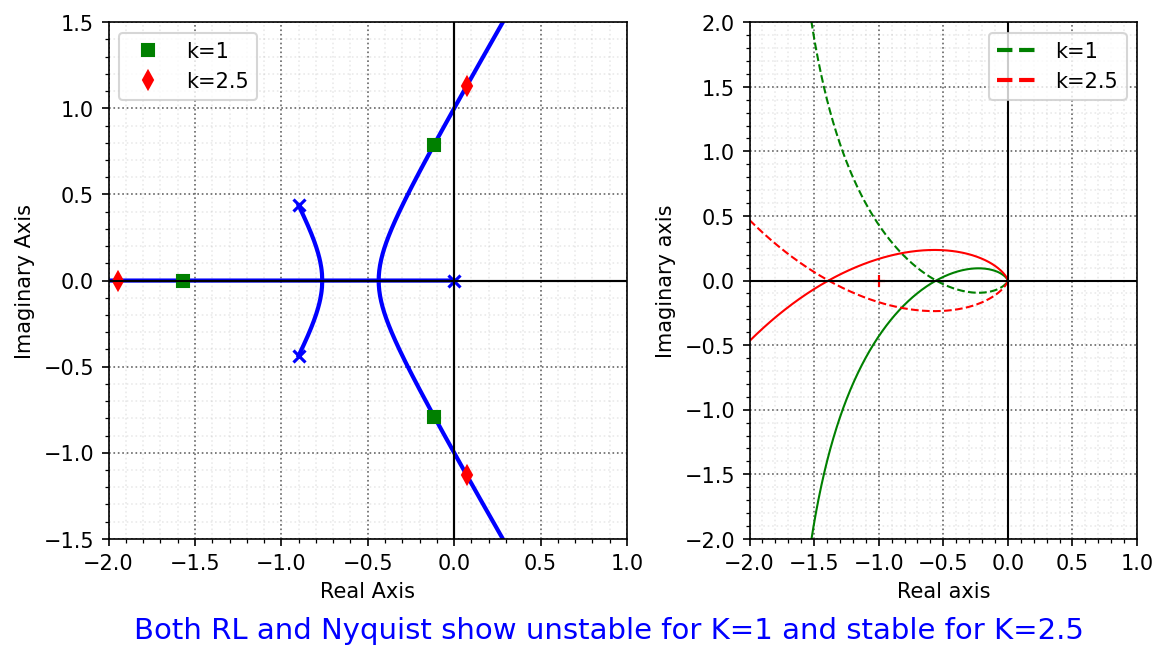

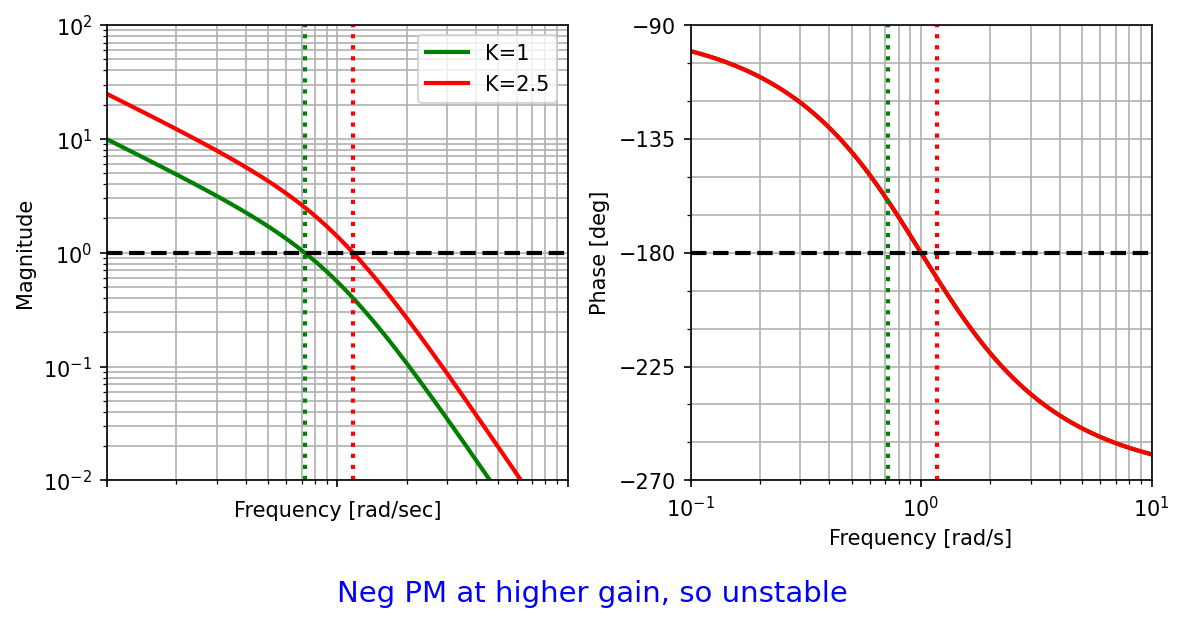

In [ ]:
# stability analysis example on 21-11
gain1 = 1
gain2 = 2.5

G = tf(1, (1,1.8,1,0))
pretty_row_print(G.poles(),"Poles of OL system: ")
Gcl1 = feedback(gain1*G,1)
Gcl2 = feedback(gain2*G,1)

scl1 = Gcl1.poles()
scl2 = Gcl2.poles()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax[0])
ax[0].set_xlim([-2, 1]);ax[0].set_ylim([-1.5, 1.5])
nicegrid(ax[0])
#ax[0].set_title('Gamma > 0, K={:2d}'.format(K),loc='left')
ax[0].plot(scl1.real,scl1.imag,'gs',ms=6,label='k='+str(gain1))
ax[0].plot(scl2.real,scl2.imag,'rd',ms=6,label='k='+str(gain2))
ax[0].set_xlabel("Real Axis")
ax[0].set_ylabel("Imaginary Axis")
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', marker='s', linestyle='None'),
    Line2D([0], [0], color='red', marker='d', linestyle='None')
]
ax[0].legend(custom_lines, ['k='+str(gain1), 'k='+str(gain2)])

plt.sca(ax[1])
kwargs = {'color':'g','linewidth':1}
resp = nyquist_response(gain1*G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
kwargs = {'color':'r','linewidth':1}
resp = nyquist_response(gain2*G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,ax=ax[1])
plt.xlim([-2,1])
plt.ylim([-2,2])
ax[1].set_aspect('equal')
nicegrid(ax)
# Create custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', linestyle='--'),
    Line2D([0], [0], color='red', linestyle='--')
]
ax[1].legend(custom_lines, ['k='+str(gain1), 'k='+str(gain2)])
caption("Both RL and Nyquist show stable for K="+str(gain1)+" and unstable for K="+str(gain2),fig)
savefig('./figs/L19_11a.pdf')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'g','linewidth':2}
Gfreq1 = bode_plot(gain1*G,plot=True,**kwargs,dB=False)
kwargs = {'color':'r','linewidth':2}
Gfreq3 = bode_plot(gain2*G,plot=True,**kwargs,dB=False)

ax1,ax2 = plt.gcf().axes
ax1.legend(('K='+str(gain1),'K='+str(gain2)))
ax2.axhline(y=-180,c='k',ls="--")
ax1.axhline(y=1,c='k',ls="--")
ax1.set_ylim(.01,100)
wc1 = np.interp(1,np.flipud(Gfreq1[0]),np.flipud(Gfreq1[2]))
wc3 = np.interp(1,np.flipud(Gfreq3[0]),np.flipud(Gfreq3[2]))
ax1.axvline(x=wc1,c='g',ls=":")
ax2.axvline(x=wc1,c='g',ls=":")
ax1.axvline(x=wc3,c='r',ls=":")
ax2.axvline(x=wc3,c='r',ls=":")
ax[0].set_xlabel("Frequency [rad/sec]")
caption("Neg PM at higher gain, so unstable",fig)
savefig('./figs/L19_11b.pdf')


## Examples on 16-9 and 16-10

<TransferFunction>: sys[712]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   0.38 s^2 + 0.038 s + 0.209
---------------------------------
s^4 + 1.06 s^3 + 0.56 s^2 + 0.5 s



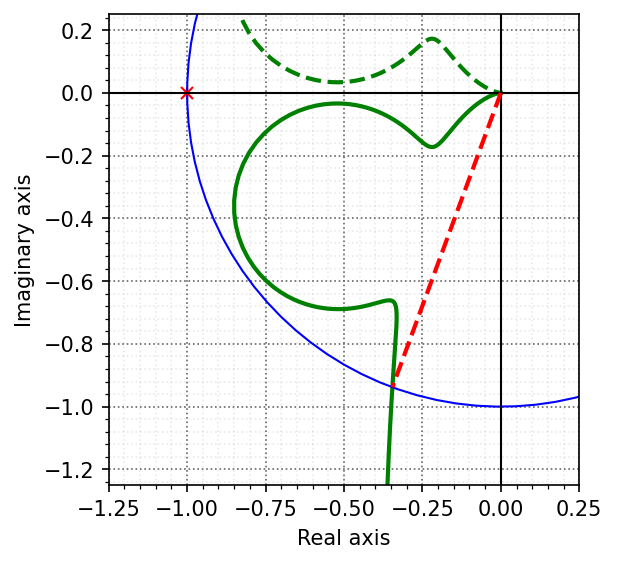

Phase Margin = 69.77


In [43]:
from control_materials import *
# L15 PM/GM Examples
w = np.logspace(-3,3,5000)
an = np.linspace(0, 2 * np.pi, 100) # unit circle

#L(s) =  \frac{0.38( s^2 + 0.1 s + 0.55)}{s(s+1)(s^2+0.06s+0.5)}
G = 0.38*tf([1],[1, 1, 0])*tf([1,.1,.55],[1,.06,.5]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
resp = nyquist_response(G,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='g',linewidth=2,ax=ax)

plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,.25])
plt.ylim([-1.25,.25])
nicegrid(ax)

gm, pm, wcg, wcp =  margin(G)
#print([gm,wcg,pm,wcp])
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')
savefig("./figs/L19_GM_PM_1.pdf", dpi=600)
plt.show()

print("Phase Margin = {:3.2f}".format(pm))


# L21 PM/GM Examples - Robustness Question


<TransferFunction>: sys[722]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   0.38 s^2 + 0.038 s + 0.209
---------------------------------
s^4 + 1.06 s^3 + 0.56 s^2 + 0.5 s



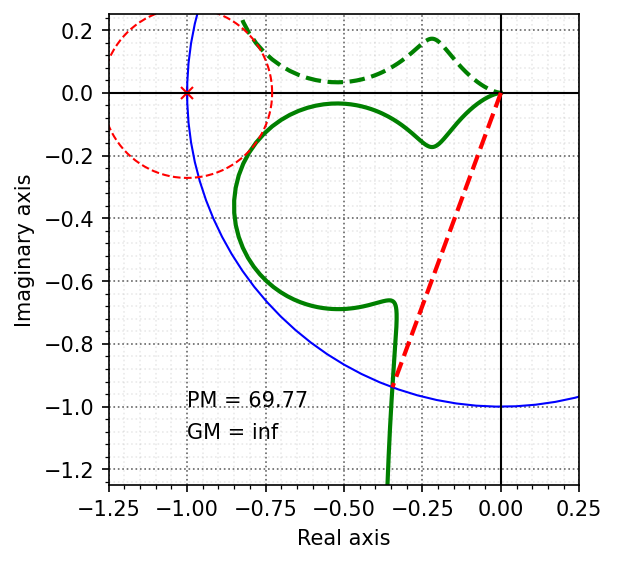

In [44]:
w = np.logspace(-3,3,5000)
an = np.linspace(0, 2 * np.pi, 100) # unit circle

#L(s) =  \frac{0.38( s^2 + 0.1 s + 0.55)}{s(s+1)(s^2+0.06s+0.5)}
G = 0.38*tf([1],[1, 1, 0])*tf([1,.1,.55],[1,.06,.5]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
resp = nyquist_response(G,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='g',linewidth=2,ax=ax)

plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,.25])
plt.ylim([-1.25,.25])
nicegrid(ax)

gm, pm, wcg, wcp =  margin(G)
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')

Gf = G(complex(0,1)*w)
S = 1/(1+Gf)
dist_from_cp = 1/np.max(np.abs(S))
plt.plot(-1+dist_from_cp*np.cos(an), dist_from_cp*np.sin(an),'r--',lw=1)

ax.text(-1,-1,"PM = {:3.2f}".format(pm))
ax.text(-1,-1.1,"GM = {:3.2f}".format(gm))
savefig("./figs/L19_Rob_1.pdf", dpi=600)
plt.show()


<TransferFunction>: sys[732]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


    0.38 s^2 - 0.0285 s + 0.361
-----------------------------------
s^4 + 1.025 s^3 + 0.925 s^2 + 0.9 s



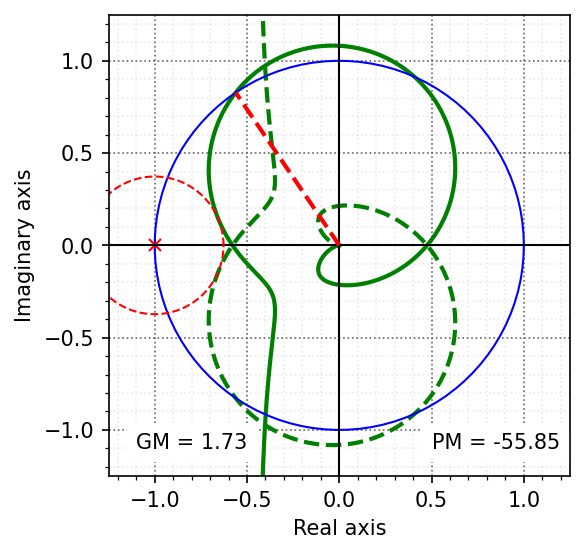

Phase Margin = -55.85


In [45]:
#L(s) =  \frac{0.3( s^2 - 0.075 s + 0.95)}{s(s+1)(s^2+0.025s+0.9)}
w = np.logspace(-3,3,50000)
G = 0.38*tf([1],[1, 1, 0])*tf([1,-.075,.95],[1,.025,.9]) 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = nyquist_response(G,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='g',linewidth=2,ax=ax)

plt.plot(np.cos(an), np.sin(an),'b-',lw=1)
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
nicegrid(ax,-1)

gm, pm, wcg, wcp =  margin(G)
plt.plot([0,-np.cos(pm/r2d)],[0,-np.sin(pm/r2d)],'r--')
Gf = G(complex(0,1)*w)
S = 1/(1+Gf)
dist_from_cp = 1/np.max(np.abs(S))
plt.plot(-1+dist_from_cp*np.cos(an), dist_from_cp*np.sin(an),'r--',lw=1)

ax.text(.5,-1.1,"PM = {:3.2f}".format(pm),backgroundcolor = 'w', color = 'k')
ax.text(-1.1,-1.1,"GM = {:3.2f}".format(gm),backgroundcolor = 'w', color = 'k')

savefig("./figs/L19_GM_PM_2.pdf", dpi=600)
plt.show()

print("Phase Margin = {:3.2f}".format(pm))


## More Examples


<TransferFunction>: sys[747]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           3000 s - 300
-----------------------------------
s^4 + 17 s^3 + 42 s^2 - 260 s + 200



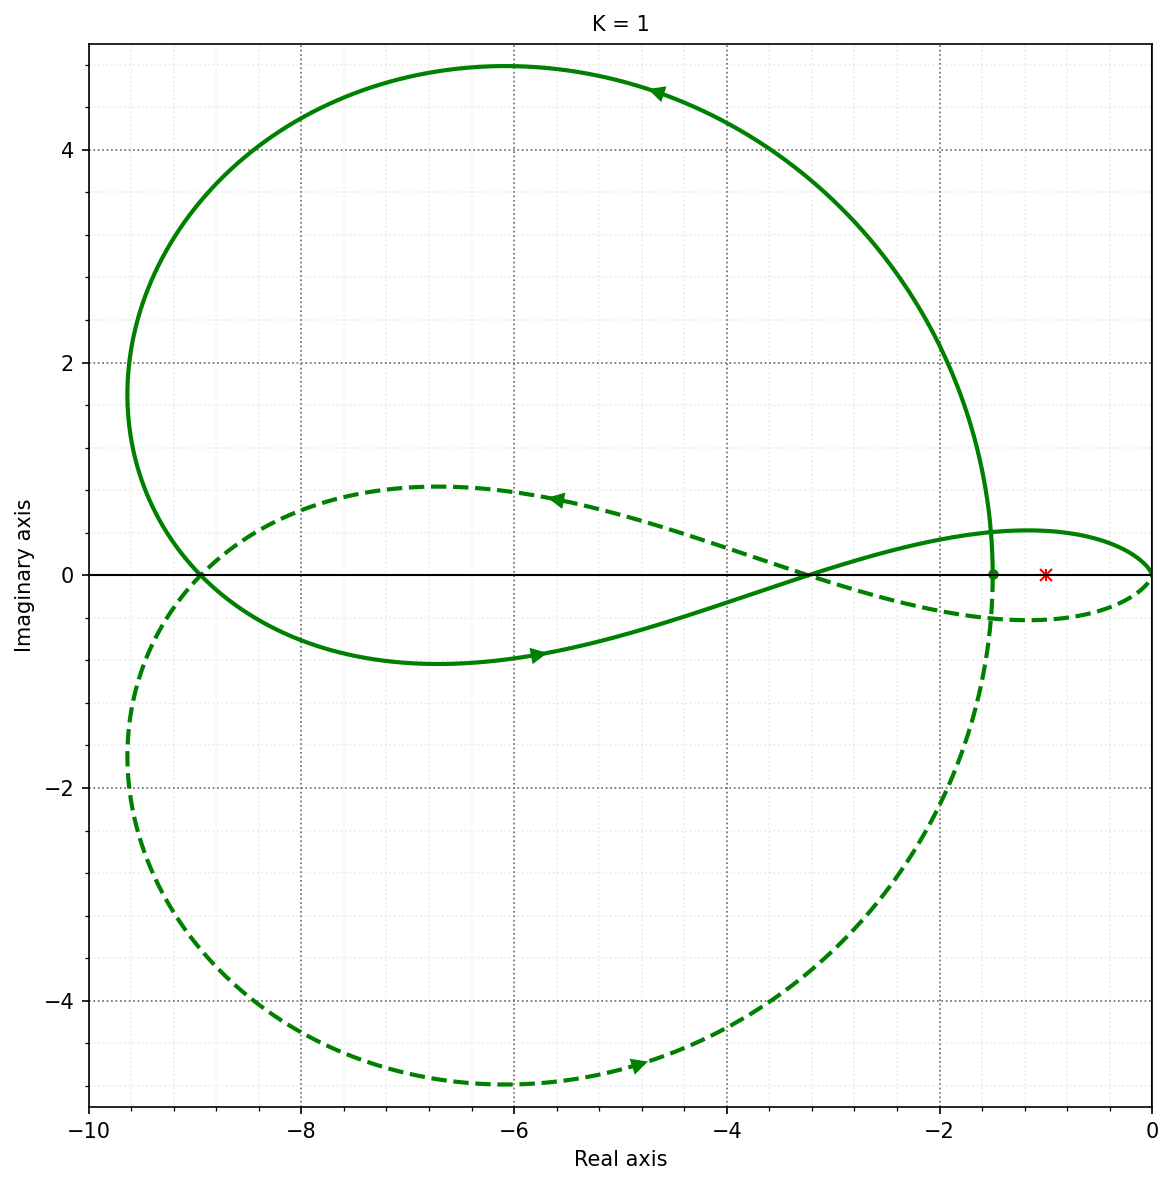

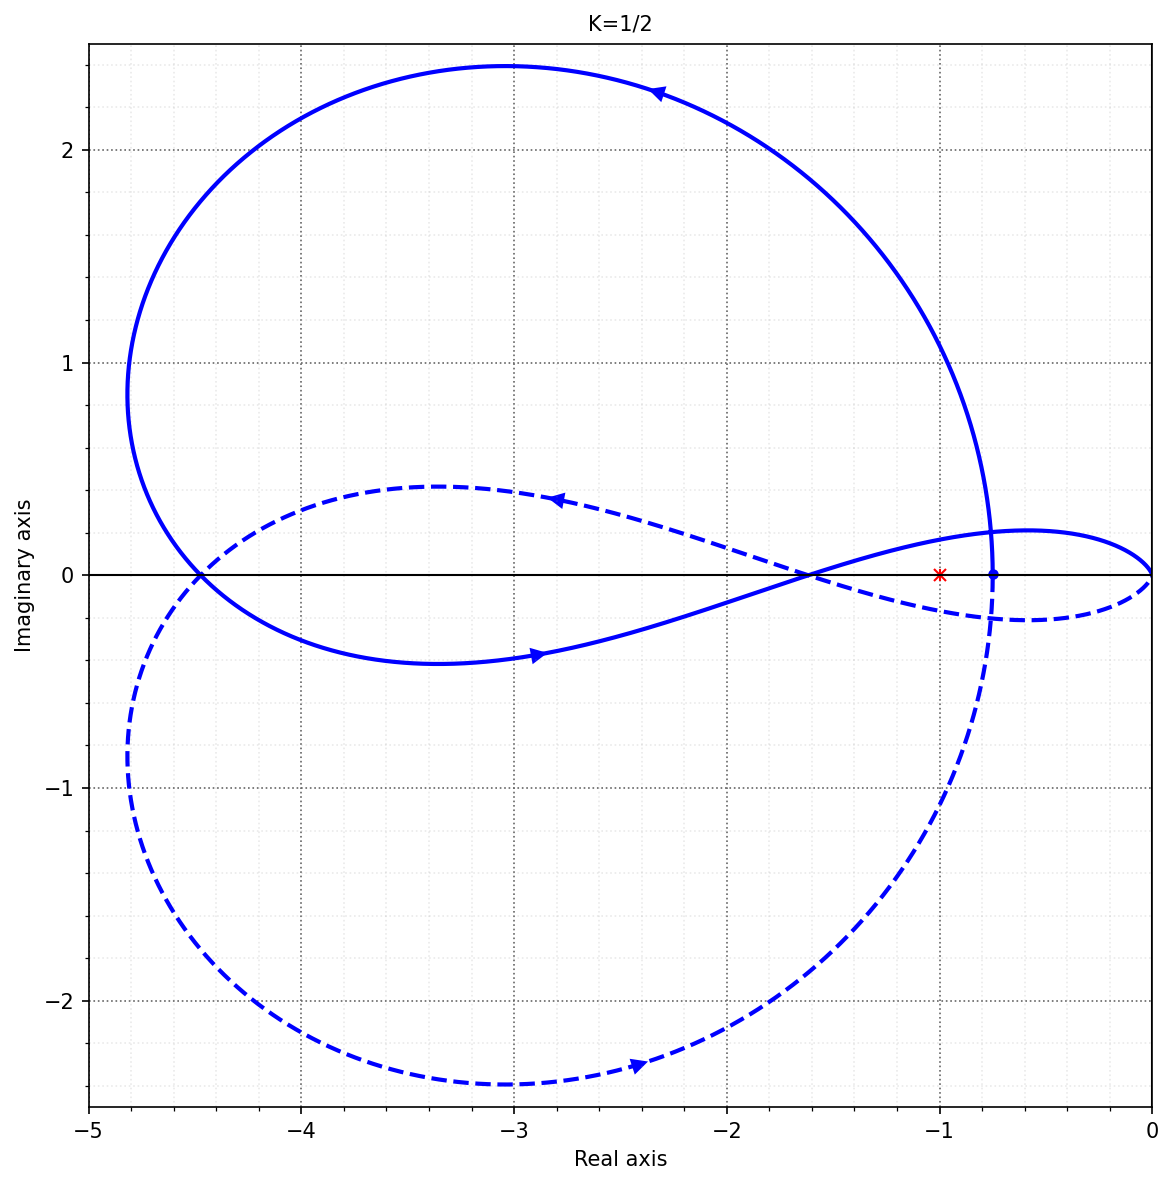

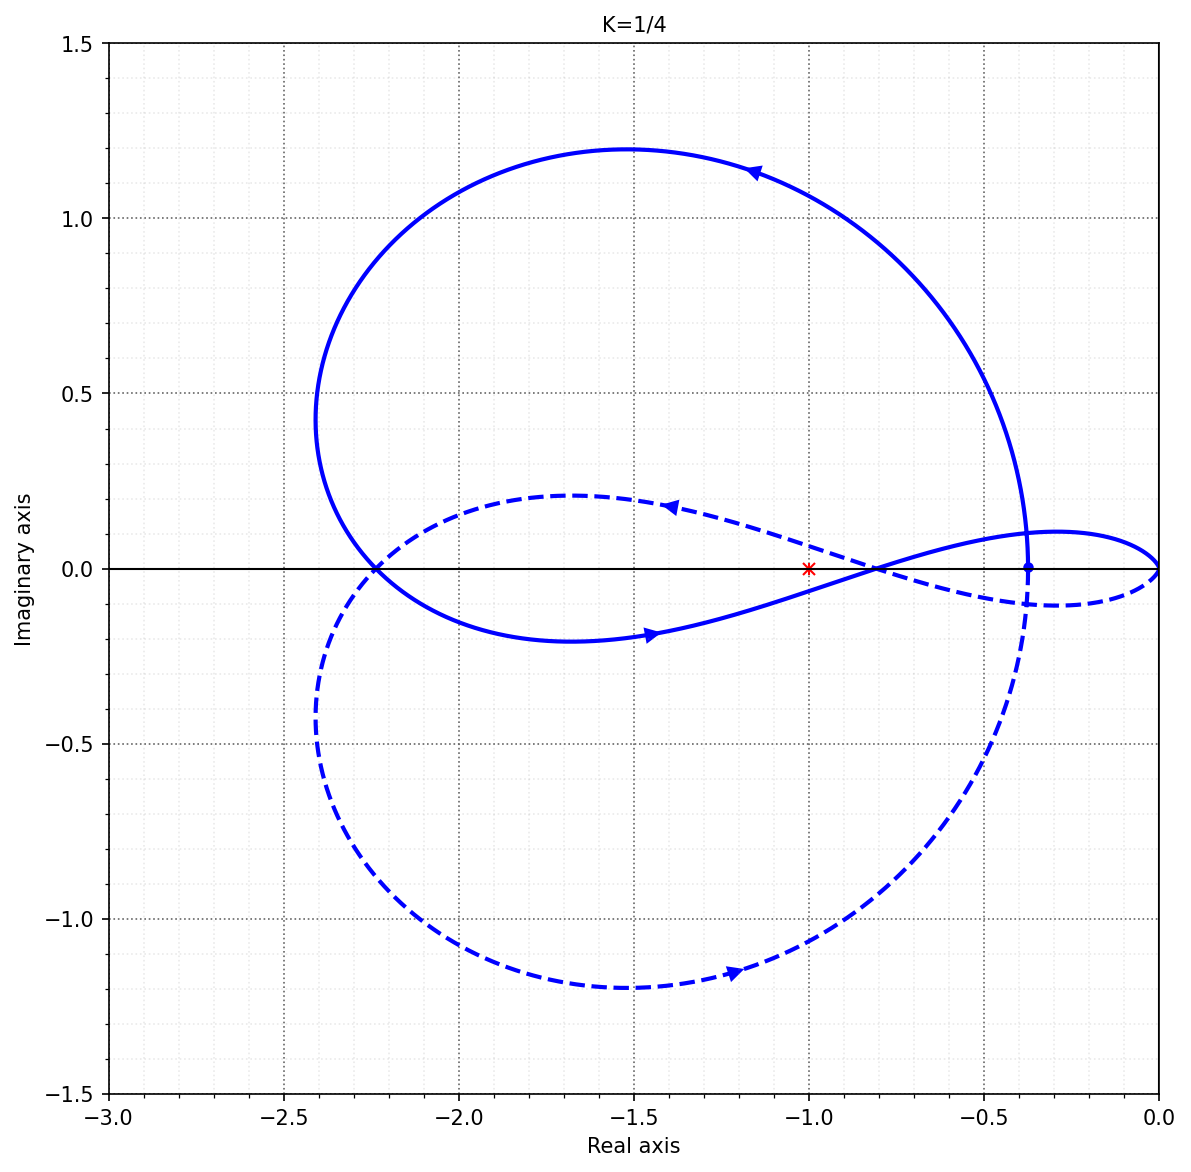

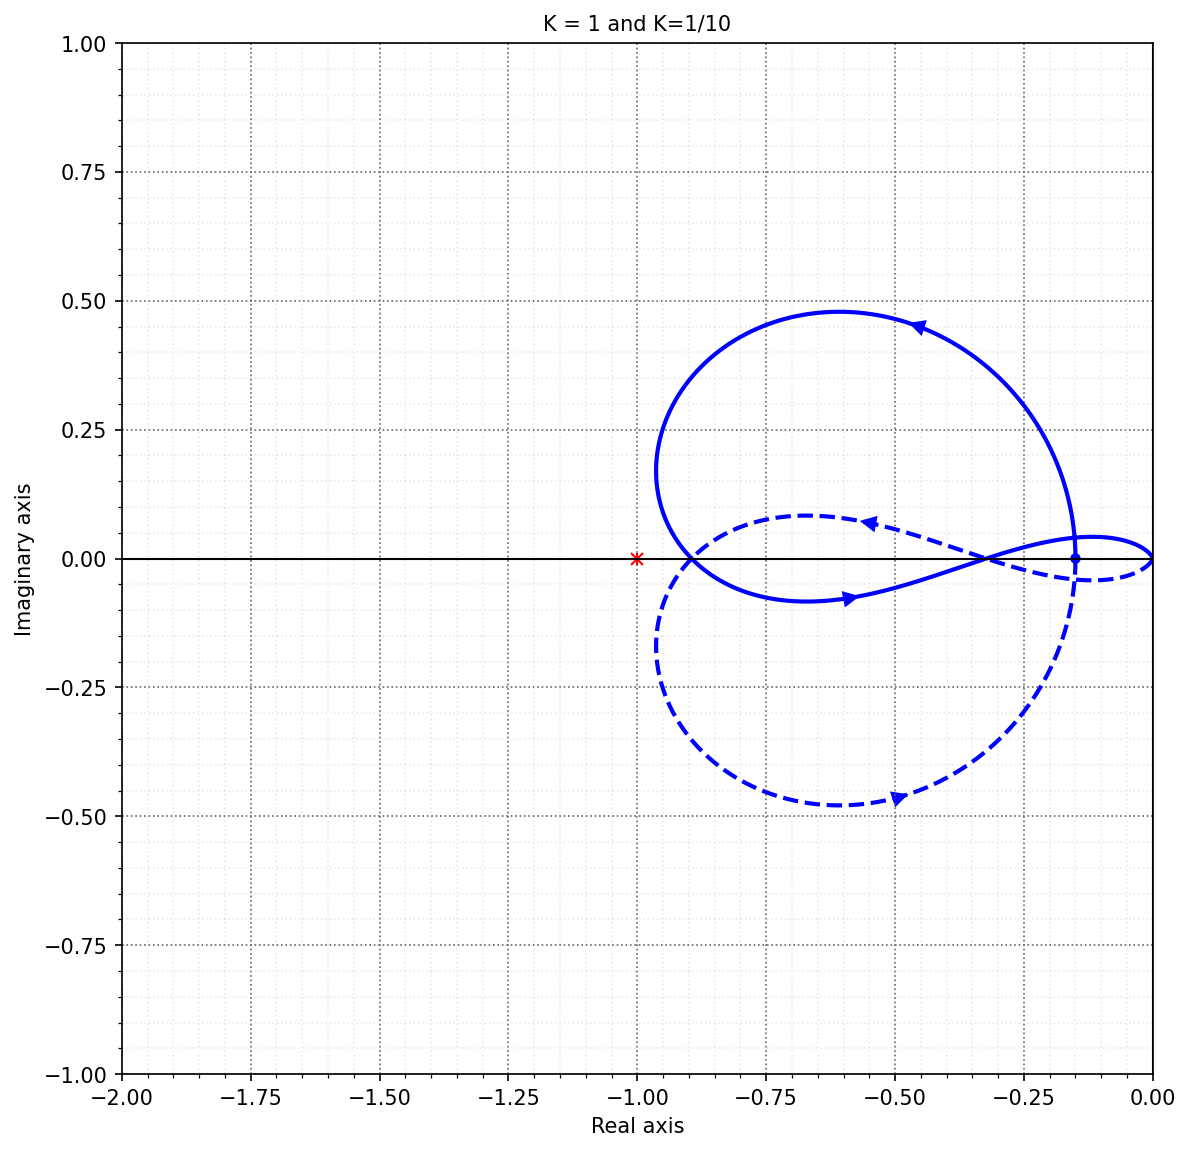

In [46]:
w = np.logspace(-3,3,50000)
G = 3000*tf([1,-0.1],[1,-1])*tf([1],[1,-2])*tf([1],[1,10])**2 
print(G)

[Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
resp = nyquist_response(G,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='g',linewidth=2,ax=ax)
plt.title('K = 1')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-10,0])
plt.ylim([-5,5])
nicegrid(ax,-1)

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
resp = nyquist_response(G/2,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.title('K=1/2')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-5,0])
plt.ylim([-2.5,2.5])
nicegrid(ax,-1)

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
resp = nyquist_response(G/4,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.title('K=1/4')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-3,0])
plt.ylim([-1.5,1.5])
nicegrid(ax,-1)

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
resp = nyquist_response(G/10,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.title('K = 1 and K=1/10')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-2,0])
plt.ylim([-1,1])
nicegrid(ax,-1)

#savefig("./figs/L19_GM_PM_2.pdf", dpi=600)
plt.show()


<TransferFunction>: sys[780]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  s^2 + 0.2 s + 0.01
----------------------
s^5 + 20 s^4 + 100 s^3



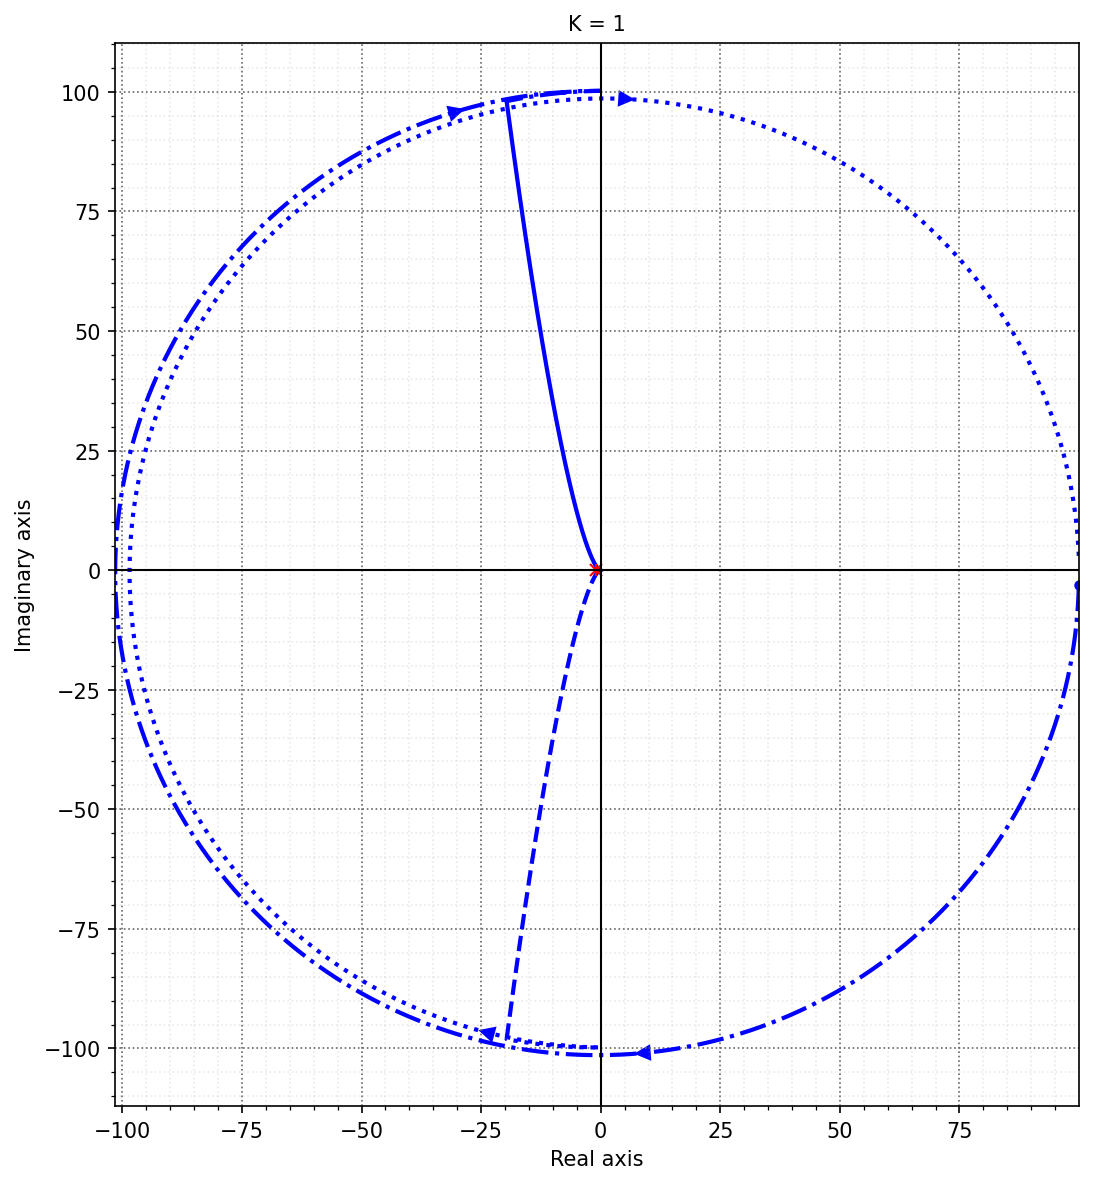

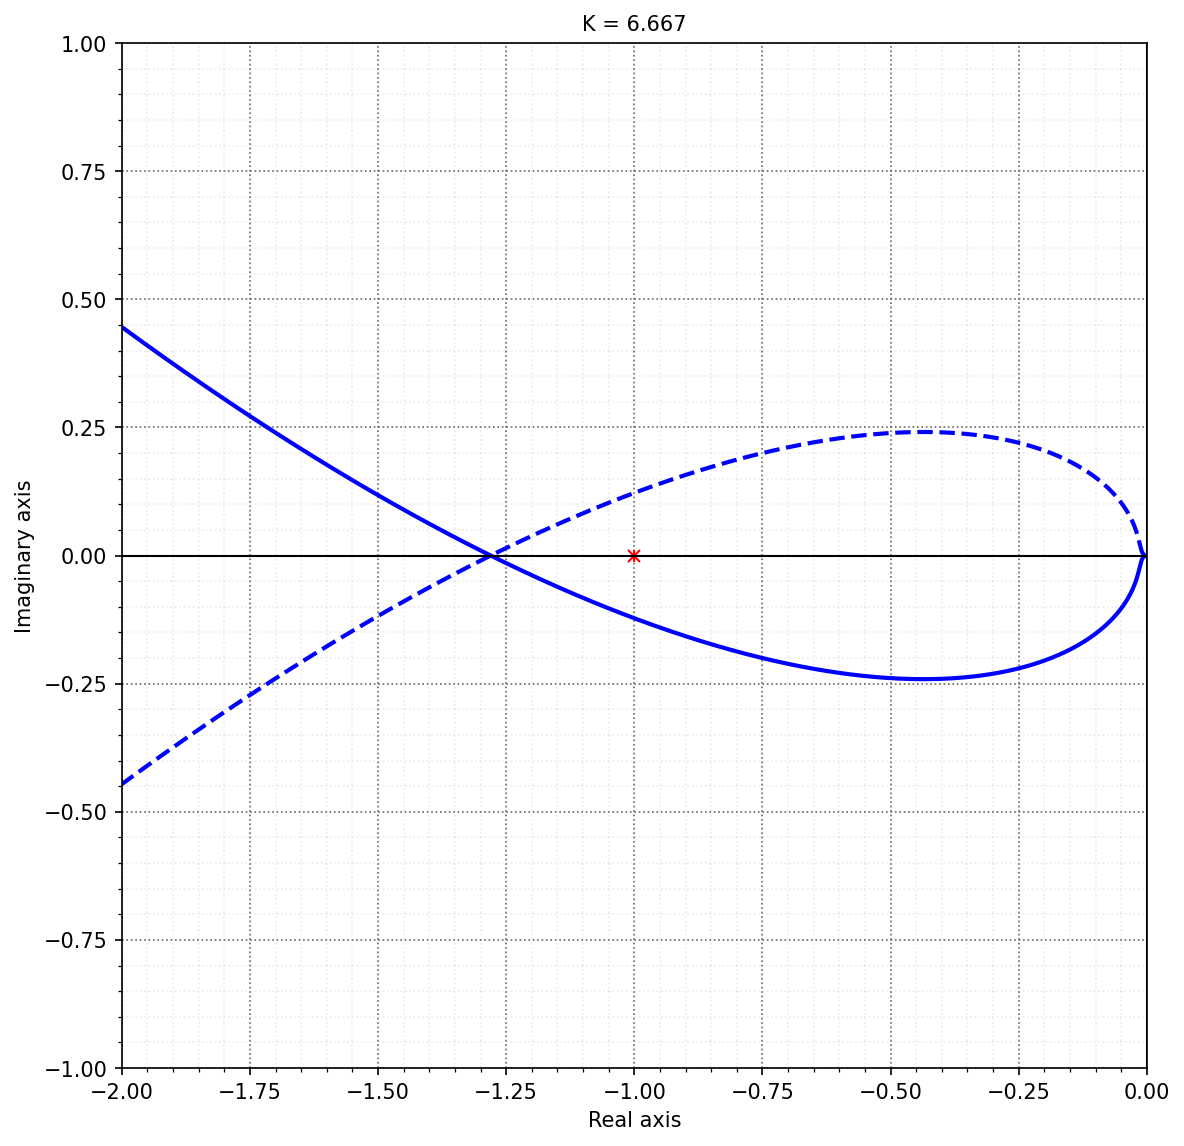

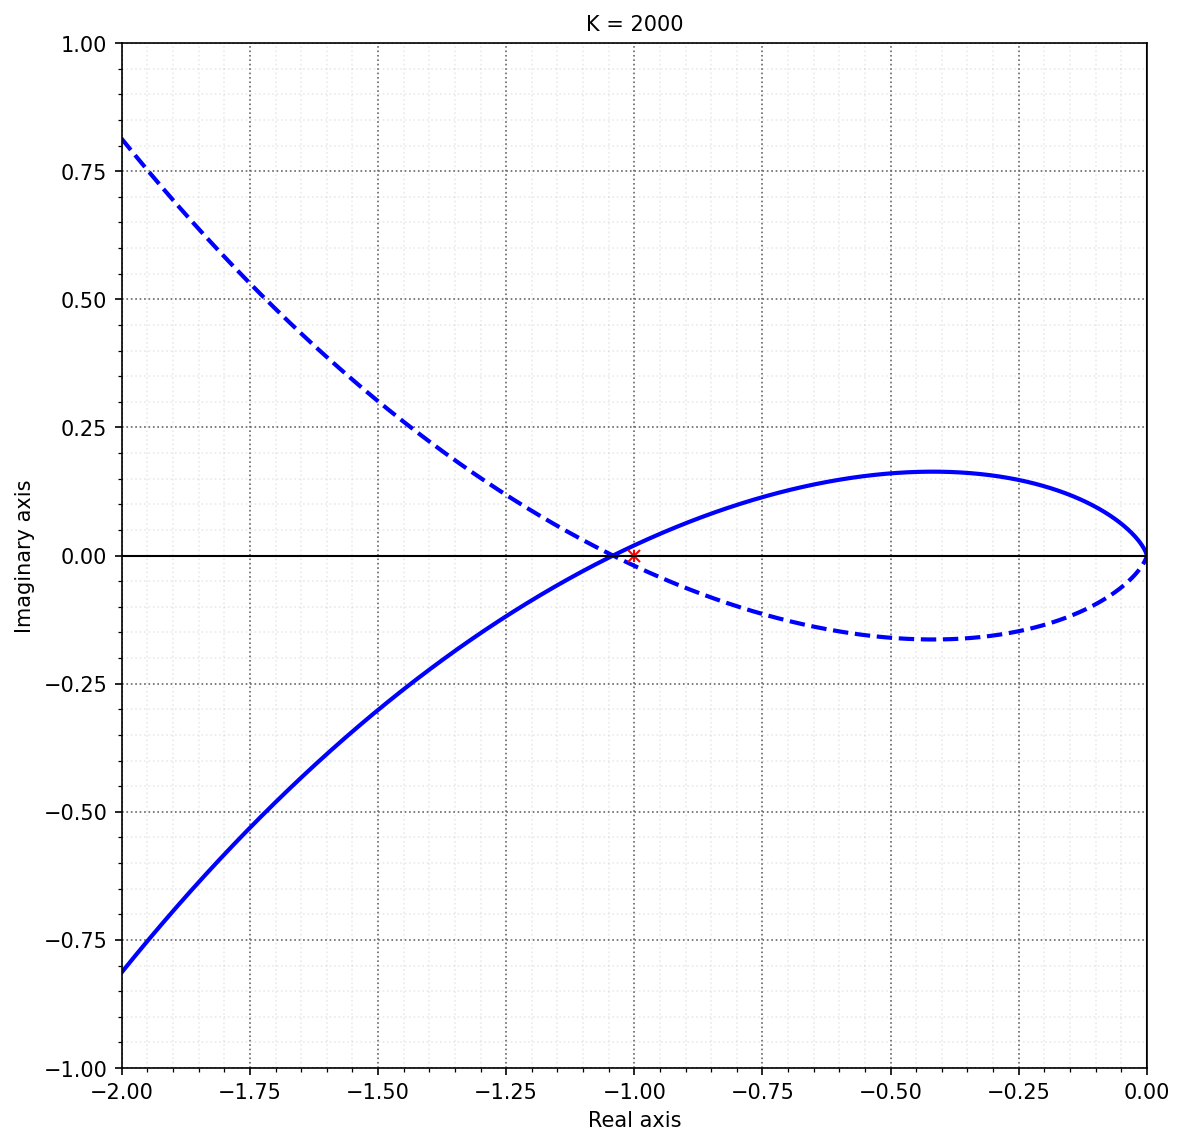

In [47]:
w = np.logspace(-6,6,50000)
G = tf([1],[1,0])**3*tf([1,.1],[1,10])**2 
print(G)
RR = 0.0001

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
plt.sca(ax);
kwargs = {'color':'g'}
resp = nyquist_response(G,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.title('K = 1')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
#plt.xlim([-2,0])
#plt.ylim([-1,1])
nicegrid(ax,-1)

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
plt.sca(ax);
resp = nyquist_response(G/.15,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.title('K = 6.667')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-2,0])
plt.ylim([-1,1])
nicegrid(ax,-1)

fig, ax = plt.subplots(1,figsize=(8, 8),dpi=150)
resp = nyquist_response(G/.0005,w,indent_direction='right',indent_points=100)
nyquist_plot(resp,color='b',linewidth=2,ax=ax)
plt.title('K = 2000')
plt.plot(-1,0,'rx',ms=6)
ax.set_aspect('equal')
plt.xlim([-2,0])
plt.ylim([-1,1])
nicegrid(ax,-1)

